# 1) Download dataset

In [1]:
!mkdir ibm_assignment2

In [2]:
cd ibm_assignment2

/content/ibm_assignment2


# 2) Load Dataset 

In [66]:
import pandas as pd 
import numpy as np
data = pd.read_csv("Churn_Modelling.csv") 

# 3) Visualisations

In [4]:
import matplotlib.pyplot as plt

### a) Univariate analysis

Histogram - Age

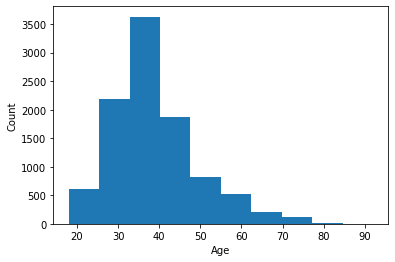

In [5]:
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### b) Bivariate Analysis

Scatter Plot - Age vs Credit Score

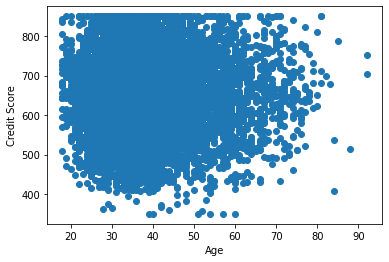

In [6]:
plt.scatter(data['Age'], data['CreditScore'])
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

Correlation Coefficients

In [20]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.008264,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012160,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.002614,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.015149,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.006435,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.008264,-0.012160,0.002614,0.015149,-0.006435,1.000000,-0.216214,-0.007936,-0.015026,0.008366,0.091143
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.216214,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.007936,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.015026,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.008366,0.014204,-0.009933,-0.011421,1.000000,0.012097


### c) Multivariate Analysis

Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783f8422d0>,
      dtype=object)

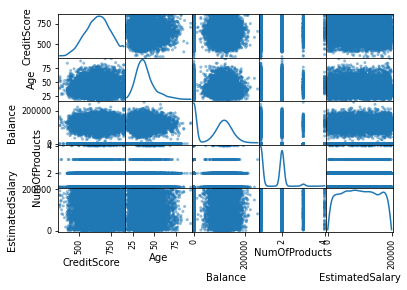

In [7]:
pd.plotting.scatter_matrix(data[["CreditScore","Age","Balance","NumOfProducts","EstimatedSalary"]], diagonal="kde")

# 4) Perform descriptive statistics on the dataset

In [9]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

# 5) Handle the Missing values

### Continuous Variables

In [10]:
cs = data[data['CreditScore'].isnull()].index.tolist()
a = data[data['Age'].isnull()].index.tolist()
t = data[data['Tenure'].isnull()].index.tolist()
b = data[data['Balance'].isnull()].index.tolist()
n = data[data['NumOfProducts'].isnull()].index.tolist()
es = data[data['EstimatedSalary'].isnull()].index.tolist()
print(cs,a,t,b,n,es)

[] [] [] [] [] []


None of the values in these columns is NA

In [11]:
cs = np.where(data['CreditScore']==0)[0]
a = np.where(data['Age']==0)[0]
t = np.where(data['Tenure']==0)[0]
b = np.where(data['Balance']==0)[0]
n = np.where(data['NumOfProducts']==0)[0]
es = np.where(data['EstimatedSalary']==0)[0]
print(cs,a,t,b,n,es)

[] [] [  29   35   57   72  127  149  164  176  187  231  252  255  263  298
  313  355  372  394  427  432  485  543  546  615  672  699  710  750
  788  801  806  849  886  953  956  980  981  987 1009 1027 1035 1082
 1094 1110 1132 1164 1171 1236 1244 1294 1304 1359 1388 1396 1467 1511
 1559 1610 1626 1637 1661 1682 1685 1706 1729 1736 1781 1810 1811 1832
 1838 1847 1897 1910 1972 1989 2003 2038 2086 2173 2211 2233 2264 2293
 2303 2305 2331 2340 2407 2419 2443 2452 2502 2504 2519 2537 2545 2547
 2550 2579 2581 2584 2602 2622 2637 2652 2686 2696 2754 2789 2806 2831
 2871 2907 2928 2950 2986 3073 3136 3168 3195 3225 3236 3240 3251 3294
 3300 3367 3421 3451 3473 3480 3532 3596 3614 3619 3637 3640 3653 3664
 3713 3715 3717 3779 3790 3798 3805 3808 3815 3822 3856 3888 3924 3956
 3960 3980 3992 4022 4073 4103 4141 4158 4175 4193 4211 4241 4274 4367
 4372 4378 4384 4392 4415 4437 4438 4443 4468 4480 4492 4532 4560 4586
 4619 4643 4660 4661 4663 4689 4696 4700 4702 4704 4713 4722 4736 4763


The Balance and Tenure Columns have 0s out of which Tenure has 0 as a valid value. The Balance values which are 0 are replaced by the mean Balance 

In [12]:
data.loc[data['Balance']==0 ,'Balance'] = data['Balance'].mean()

In [13]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


No more 0 values for Balance

In [17]:
b = np.where(data['Balance']==0)[0]
print(b)

[]


### Categorical Variables

In [14]:
geo = data[data['Geography'].isnull()].index.tolist()
gen = data[data['Gender'].isnull()].index.tolist()
card = data[data['HasCrCard'].isnull()].index.tolist()
am = data[data['IsActiveMember'].isnull()].index.tolist()
exit = data[data['Exited'].isnull()].index.tolist()
print(geo,gen,card,am,exit)

[] [] [] [] []


In [15]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


None of the categorical variables' have NA as their value

# 6) Find and replace outliers

## Finding Outliers

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 -Q1
(data < (Q1 - 1.5*IQR)) | ( data > (Q3+1.5*IQR))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,Age,Balance,CreditScore,CustomerId,EstimatedSalary,Exited,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,RowNumber,Surname,Tenure
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,True,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,True,False,False,False,False,False,False,False,False


True's in Columns indicate outliers 

## Plotting Outliers

In [67]:
def box_scatter(data, x, y):   
  fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
  sns.boxplot(data=data, x=x, ax=ax1)
  sns.scatterplot(data=data, x=x,y=y,ax=ax2)

CreditScore
	# of Bivariate Outliers: 15
Age
	# of Bivariate Outliers: 359
EstimatedSalary
	# of Bivariate Outliers: 0
Balance
	# of Bivariate Outliers: 0


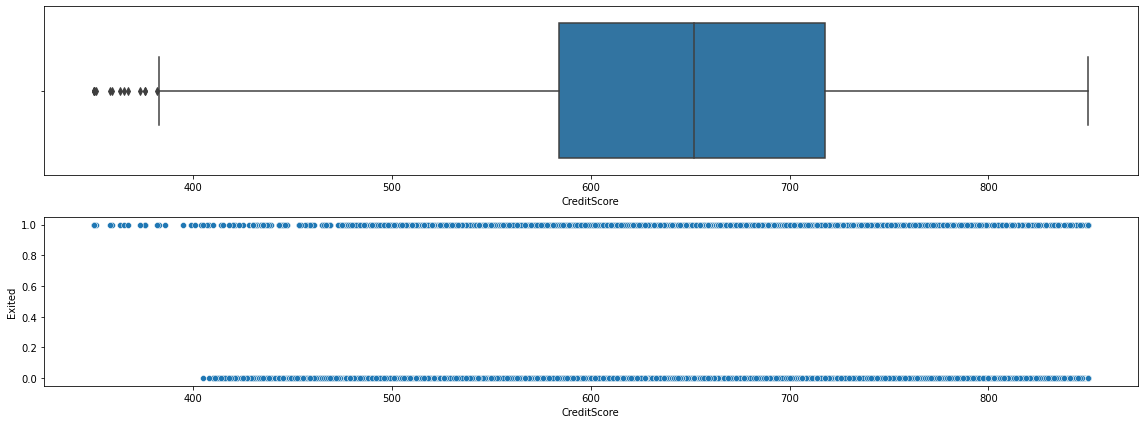

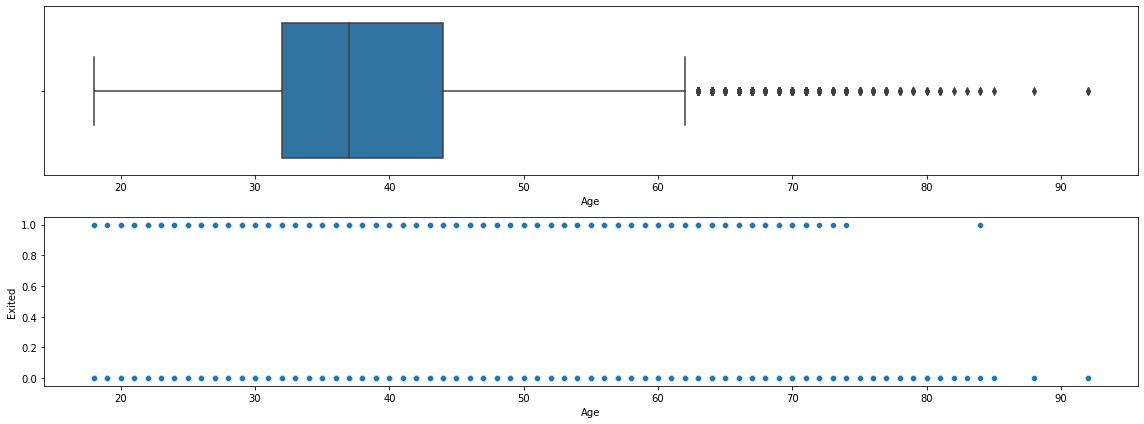

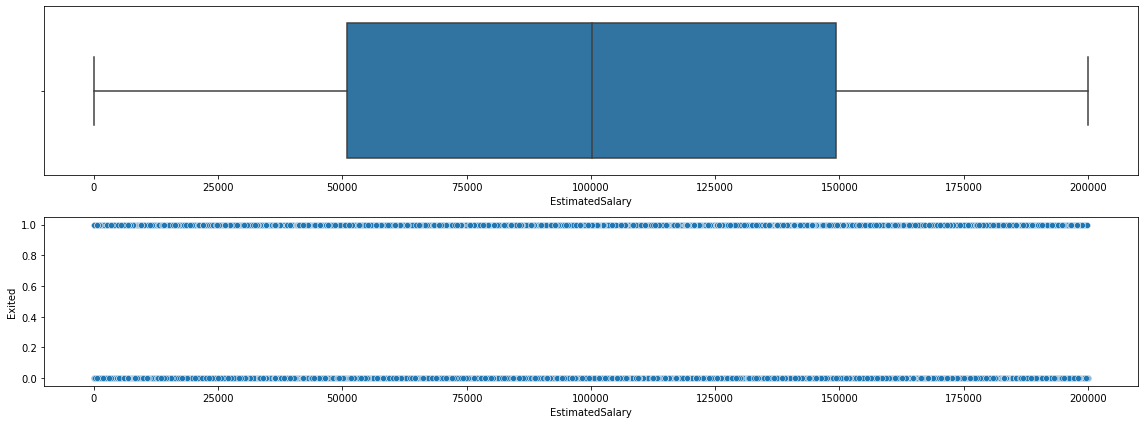

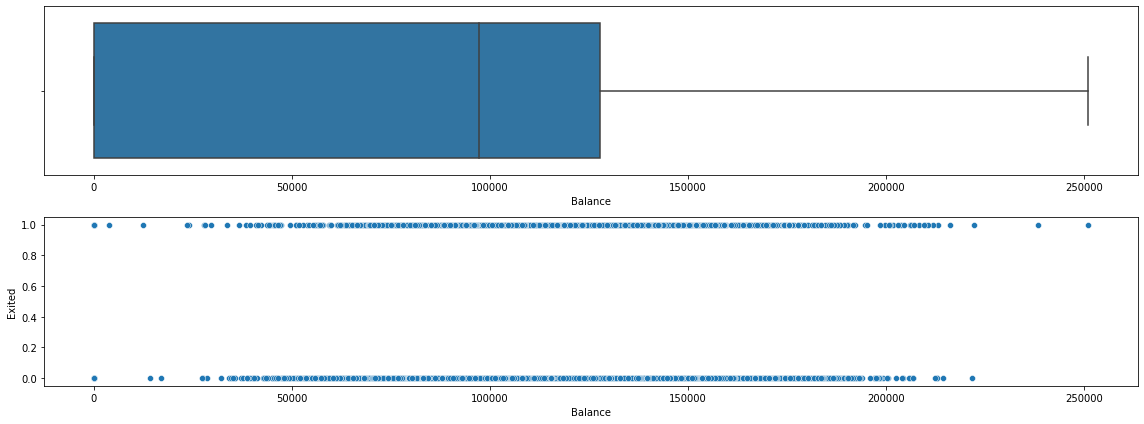

In [68]:
for i in ['CreditScore', 'Age','EstimatedSalary', 'Balance']:
      q1=data[i].quantile(0.25)
      q3=data[i].quantile(0.75)
      iqr=q3-q1
      upper=q3+1.5*iqr
      lower=q1-1.5*iqr

      box_scatter(data, i, 'Exited')
      plt.tight_layout()
      print(i)
      print(f"\t# of Bivariate Outliers: {len(data.loc[data[i] < lower] + data.loc[data[i] > upper])}")


## Replacing Outliers

In [69]:
for i in ['CreditScore', 'Age','EstimatedSalary', 'Balance']:
      q1=data[i].quantile(0.25)
      q3=data[i].quantile(0.75)
      iqr=q3-q1
      upper=q3+1.5*iqr
      lower=q1-1.5*iqr

      data[i]=np.where(data[i] >upper, upper, data[i])
      data[i]=np.where(data[i] <lower, lower, data[i])

## Outlier plots and values after replacing

CreditScore
	# of Bivariate Outliers: 0
Age
	# of Bivariate Outliers: 0
EstimatedSalary
	# of Bivariate Outliers: 0
Balance
	# of Bivariate Outliers: 0


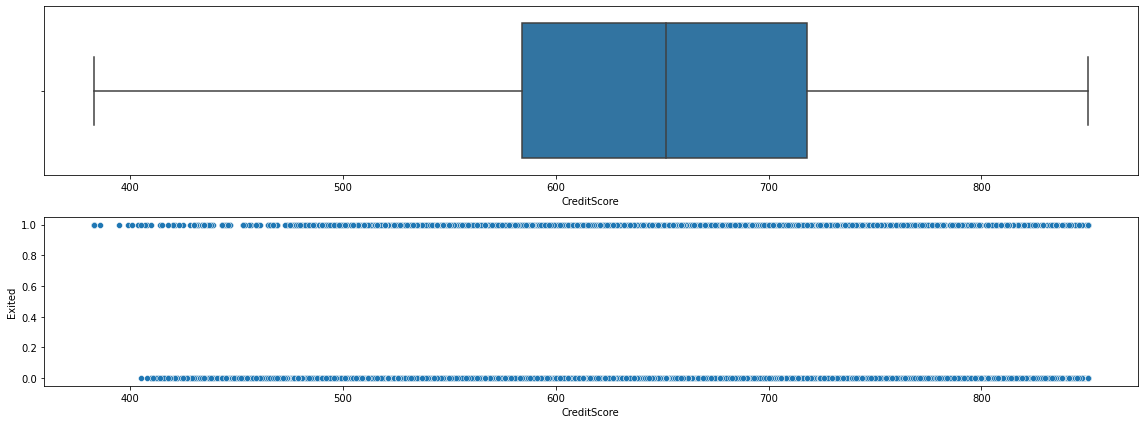

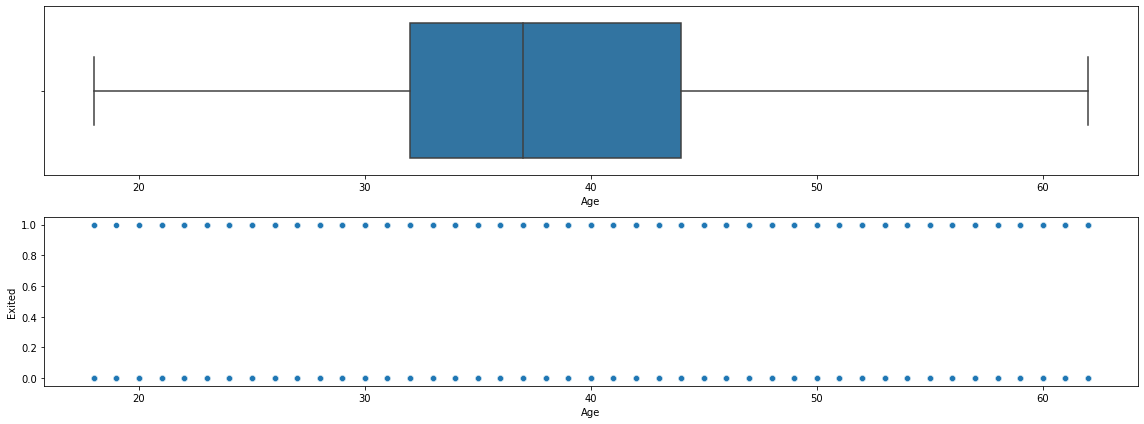

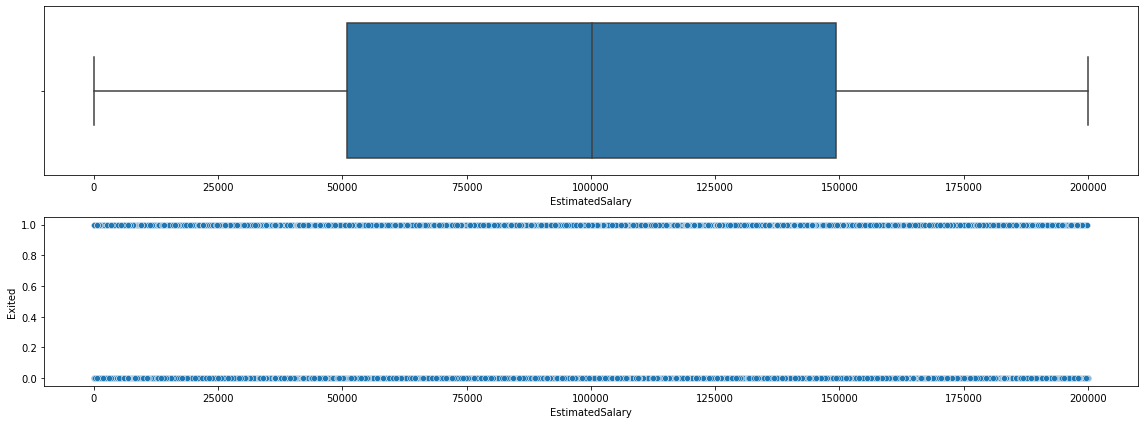

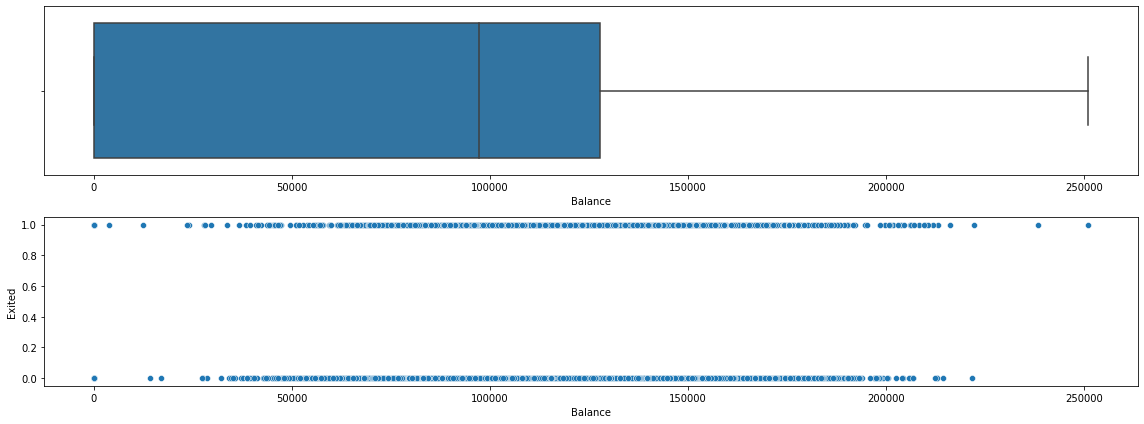

In [70]:
for i in ['CreditScore', 'Age','EstimatedSalary', 'Balance']:
      print(i)
      print(f"\t# of Bivariate Outliers: {len(data.loc[data[i] < lower] + data.loc[data[i] > upper])}")
      box_scatter(data, i, 'Exited')
      plt.tight_layout()


# 7) Perform encoding for categorical data

## Finding Categorical Columns

In [72]:
data.select_dtypes(exclude='number')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


## Encoding

### a) One Hot Encoding

In [73]:
one_hot_1 = pd.get_dummies(data['Geography'])
one_hot_2 = pd.get_dummies(data['Gender'])
df1 = data.join(one_hot_1)
df1 = df1.join(one_hot_2)
df1 = df1.drop('Geography',axis = 1)
df1 = df1.drop('Gender',axis = 1)

In [74]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619.0,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502.0,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699.0,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,39.0,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516.0,35.0,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709.0,36.0,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772.0,42.0,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


### b) Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
    if data[i].dtype=='object' or data[i].dtype=='category':
        data[i]=encoder.fit_transform(data[i])

In [77]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771.0,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516.0,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709.0,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772.0,1,1,42.0,3,75075.31,2,1,0,92888.52,1


# 8) Split the data into dependent and independent variables.

In [78]:
independent = df1.iloc[:, df1.columns != 'Exited']
independent.drop('Surname', axis=1, inplace=True)
dependent = df1.iloc[:, df1.columns == 'Exited']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
independent

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,1,15634602,619.0,42.0,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,15647311,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,15619304,502.0,42.0,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,15701354,699.0,39.0,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,15737888,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771.0,39.0,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,9997,15569892,516.0,35.0,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,9998,15584532,709.0,36.0,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,9999,15682355,772.0,42.0,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [80]:
dependent

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# 9) Scale the independent variables

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(independent)

Scaled independent variables

In [83]:
print(x)

[[-1.73187761 -0.78321342 -0.32687761 ... -0.57380915  1.09598752
  -1.09598752]
 [-1.7315312  -0.60653412 -0.44080365 ...  1.74273971  1.09598752
  -1.09598752]
 [-1.73118479 -0.99588476 -1.53863634 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [ 1.73118479 -1.47928179  0.60524449 ... -0.57380915  1.09598752
  -1.09598752]
 [ 1.7315312  -0.11935577  1.25772996 ... -0.57380915 -0.91241915
   0.91241915]
 [ 1.73187761 -0.87055909  1.4648682  ... -0.57380915  1.09598752
  -1.09598752]]


# 10) Split the data into training and testing

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,dependent,test_size=0.33)

In [85]:
x_train.shape

(6700, 15)

In [86]:
y_train.shape

(6700, 1)

In [87]:
x_test.shape

(3300, 15)

In [88]:
y_test.shape

(3300, 1)